In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advanced Soybean Agricultural Dataset.csv")
df.head()

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60


In [5]:
df.shape

(55450, 15)

In [6]:
df.isnull().sum()

Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64

G: Refers to the genotype of soybean, consisting of six different genotypes.<br>C: Represents salicylic acid, which has two levels (250 mg and 450 mg), along with a third level as a standard control.<br>S: Indicates water stress, which includes two levels:

Water stress at 5% of field capacity.
Water stress at 70% of field capacity.


Looking at this information, we can create more features based on the parameters.

G1 - G6: As the genotypes<br>C1-C3: As the Salicylic acid<br>S1-S2: As the water stress

In [18]:
df["Salicylic Acid"] = df["Parameters"].str[:2]
df["Water Stress"] = df["Parameters"].str[2:4]
df["Genotype"] = df["Parameters"].str[4:]

In [19]:
df.head()

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),Salicylic Acid,Water Stress,Genotype
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,C1,S1,G5
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,C2,S3,G4
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,C2,S1,G6
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,C1,S1,G1
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,C1,S2,G6


In [20]:
df.drop(columns="Parameters", inplace=True)

In [21]:
df

,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),Salicylic Acid,Water Stress,Genotype
0,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,C1,S1,G5
1,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,C2,S3,G4
2,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,C2,S1,G6
3,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,C1,S1,G1
4,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,C1,S2,G6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55445,R1,52.4,136.0,223.0,0.523,0.713,1.9,3.3,38.2,38.1,0.07,5216.2,2.06,0.50,C1,S1,G2
55446,R1,45.7,145.0,111.0,0.466,0.756,1.4,2.2,37.7,28.8,0.09,3211.2,1.84,0.44,C1,S1,G6
55447,R1,50.0,166.3,85.0,0.523,0.676,8.5,1.3,36.5,35.2,0.08,4358.8,2.20,0.58,C1,S2,G2
55448,R3,44.0,209.0,132.0,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32,C1,S2,G3


In [39]:
df.T.duplicated(), df.duplicated().sum()

(Random                                     False
 Plant Height (PH)                          False
 Number of Pods (NP)                        False
 Biological Weight (BW)                     False
 Sugars (Su)                                False
 Relative Water Content in Leaves (RWCL)    False
 ChlorophyllA663                            False
 Chlorophyllb649                            False
 Protein Percentage (PPE)                   False
 Weight of 300 Seeds (W3S)                  False
 Leaf Area Index (LAI)                      False
 Seed Yield per Unit Area (SYUA)            False
 Number of Seeds per Pod (NSP)              False
 Protein Content (PCO)                      False
 Salicylic Acid                             False
 Water Stress                               False
 Genotype                                   False
 dtype: bool,
 np.int64(55342))

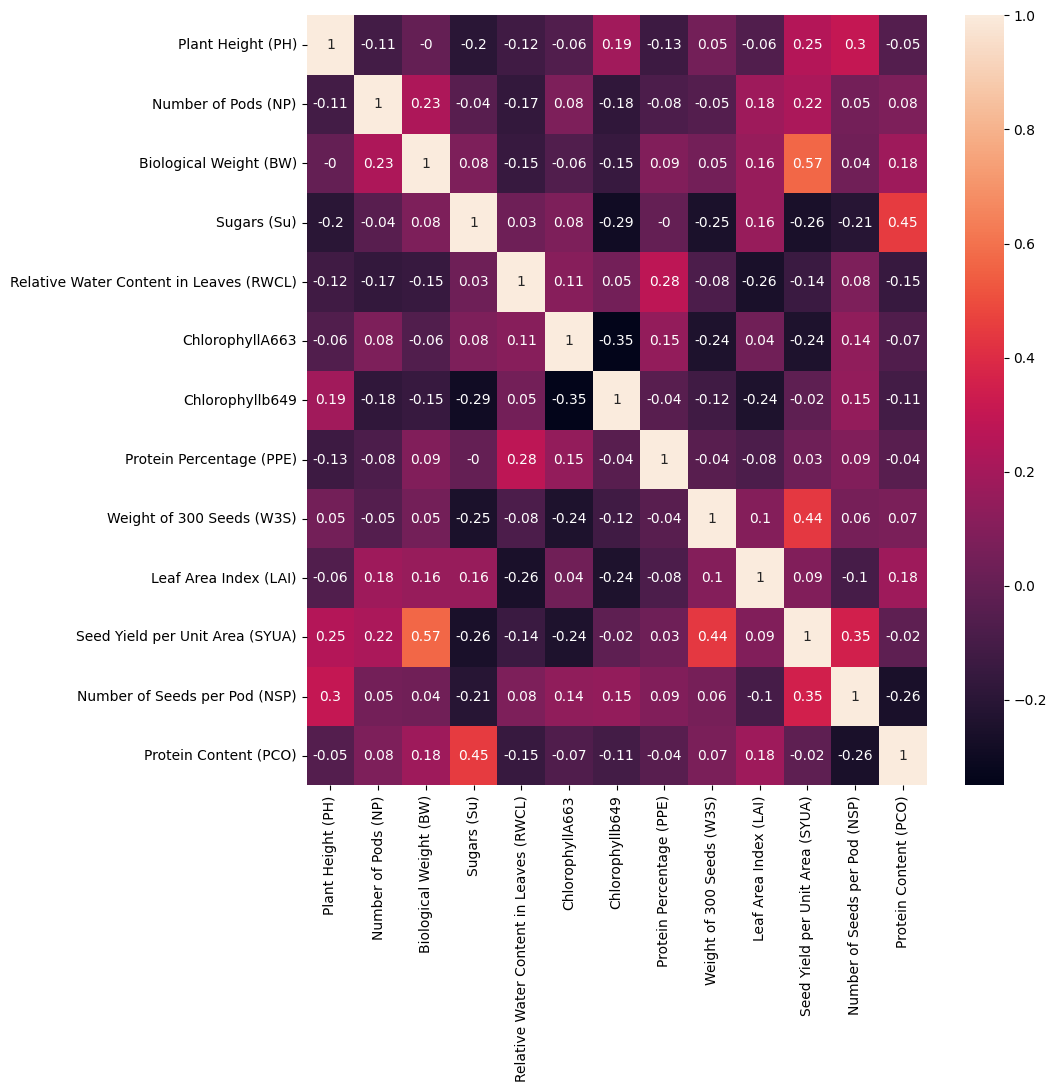

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes("number").corr().round(2), annot=True)
plt.show()

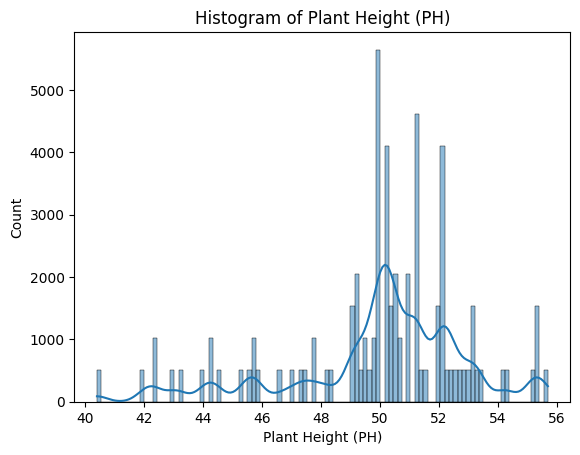

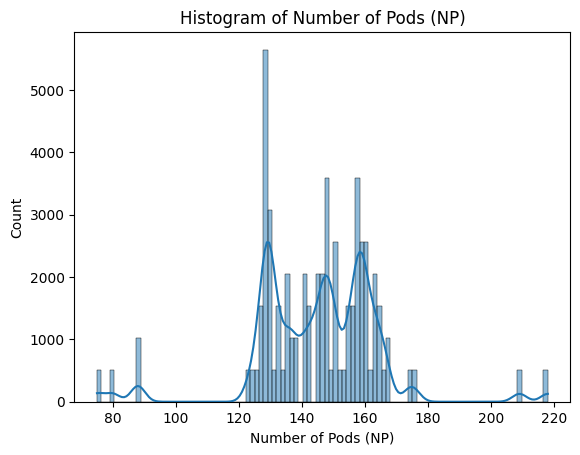

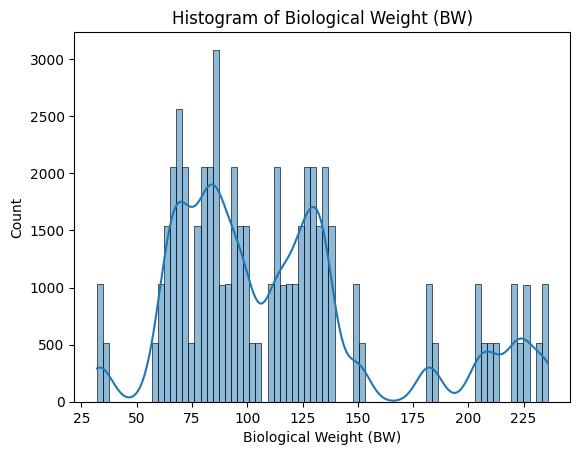

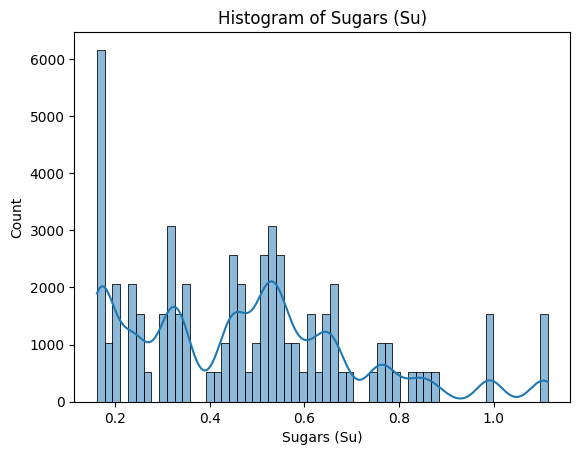

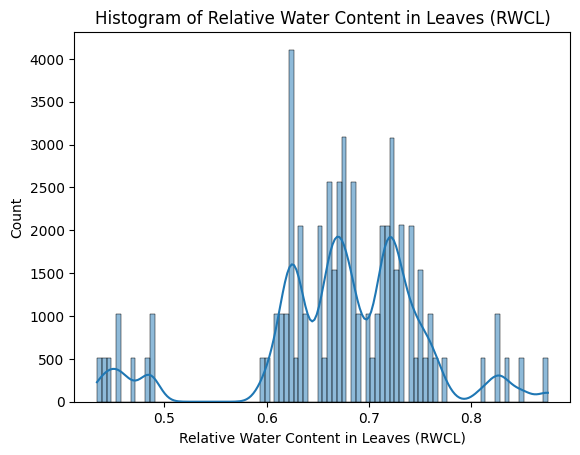

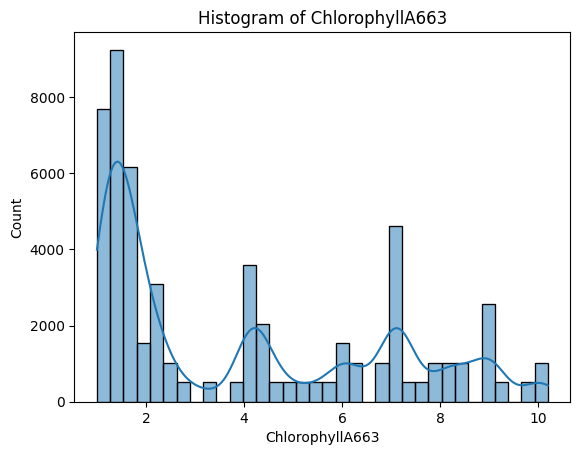

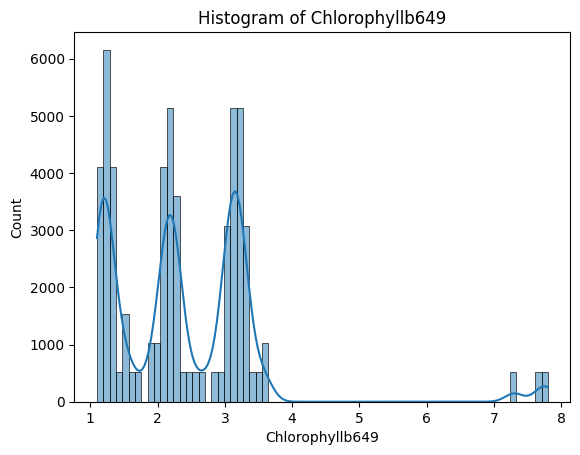

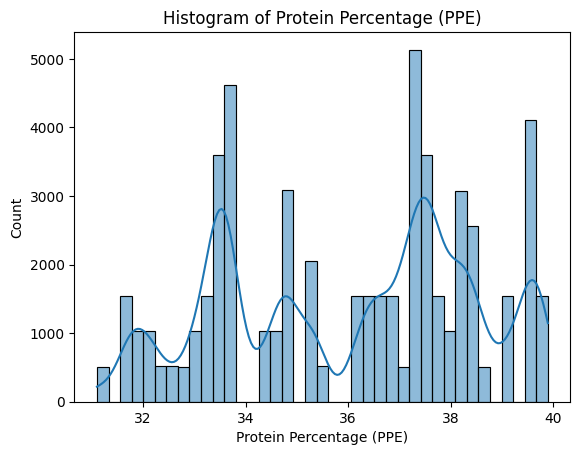

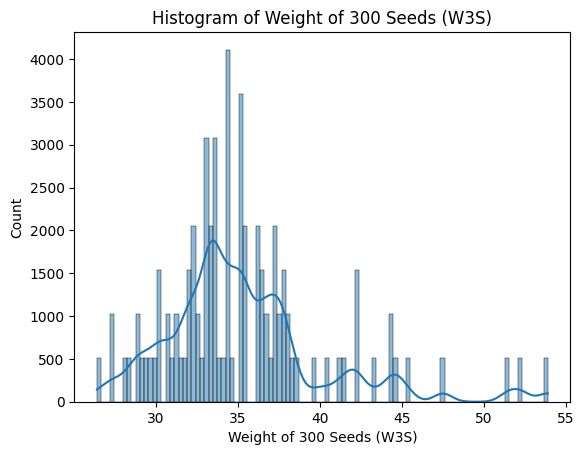

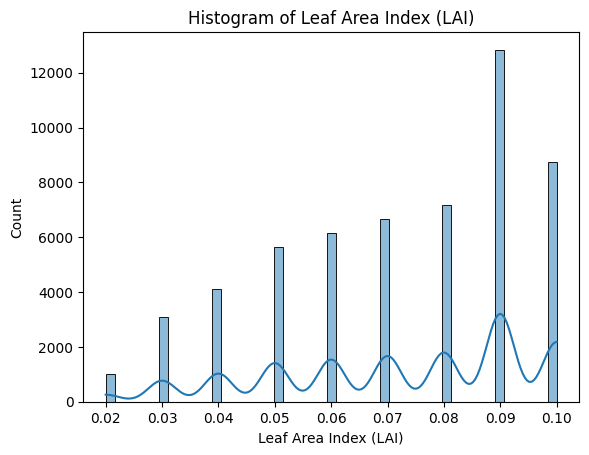

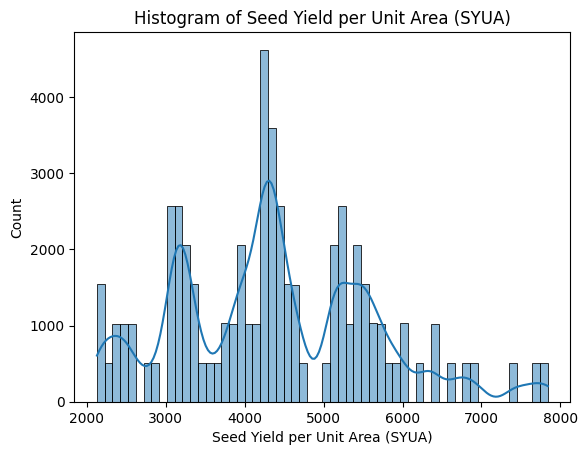

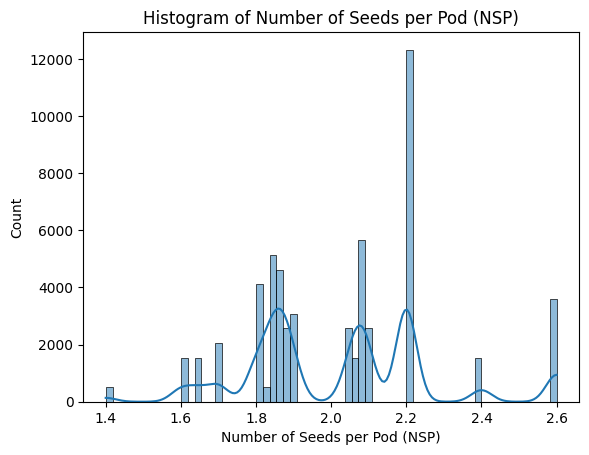

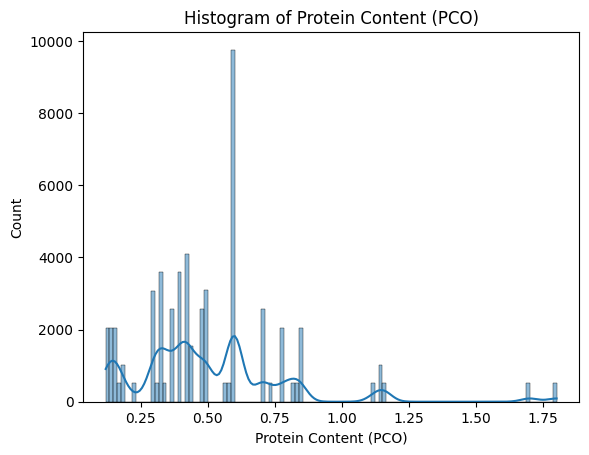

In [70]:
for i, item in enumerate(df.select_dtypes("number"), 1):
    sns.histplot(data=df, x=item, kde=True )
    plt.title(f"Histogram of {item}")
    plt.show()

Since there isn't really a target variable, this can be considered as a unsupervised learning dataset.

On that note, `K-means clustering` is going to be used.

In [71]:
df.columns

Index(['Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)', 'Salicylic Acid', 'Water Stress', 'Genotype'],
      dtype='object')

## Encoding

In [77]:
df.select_dtypes("object")

,Random,Salicylic Acid,Water Stress,Genotype
0,R1,C1,S1,G5
1,R1,C2,S3,G4
2,R1,C2,S1,G6
3,R1,C1,S1,G1
4,R2,C1,S2,G6
...,...,...,...,...
55445,R1,C1,S1,G2
55446,R1,C1,S1,G6
55447,R1,C1,S2,G2
55448,R3,C1,S2,G3


Since the object datatypes all seem to be quite ordinal, Label encoding would be used

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes("object").columns:
    df[col] = le.fit_transform(df[col])

In [79]:
df

,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),Salicylic Acid,Water Stress,Genotype
0,0,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,0,0,4
1,0,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,1,2,3
2,0,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,1,0,5
3,0,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,0,0,0
4,1,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55445,0,52.4,136.0,223.0,0.523,0.713,1.9,3.3,38.2,38.1,0.07,5216.2,2.06,0.50,0,0,1
55446,0,45.7,145.0,111.0,0.466,0.756,1.4,2.2,37.7,28.8,0.09,3211.2,1.84,0.44,0,0,5
55447,0,50.0,166.3,85.0,0.523,0.676,8.5,1.3,36.5,35.2,0.08,4358.8,2.20,0.58,0,1,1
55448,2,44.0,209.0,132.0,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32,0,1,2


In [73]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

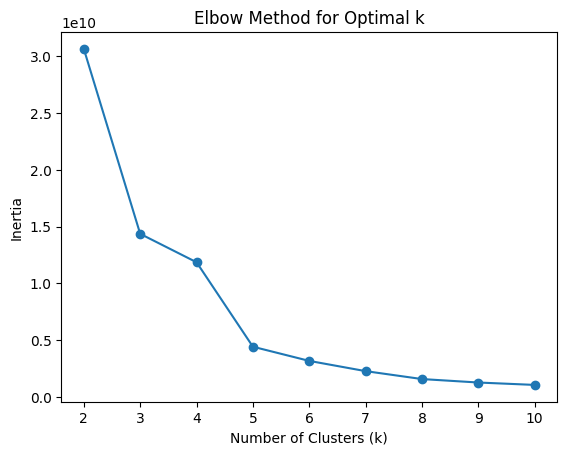

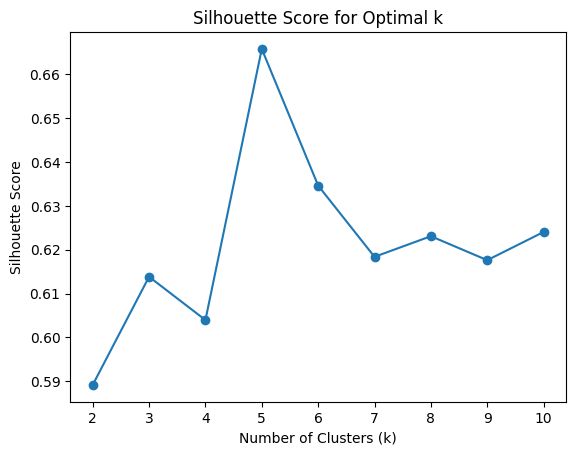

In [80]:
inertia = []
sil_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    sil_scores.append(silhouette_score(df, labels))

plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.plot(k_values, sil_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

In [82]:
optimal_k = 5
kmeans = KMeans(5, random_state=42)

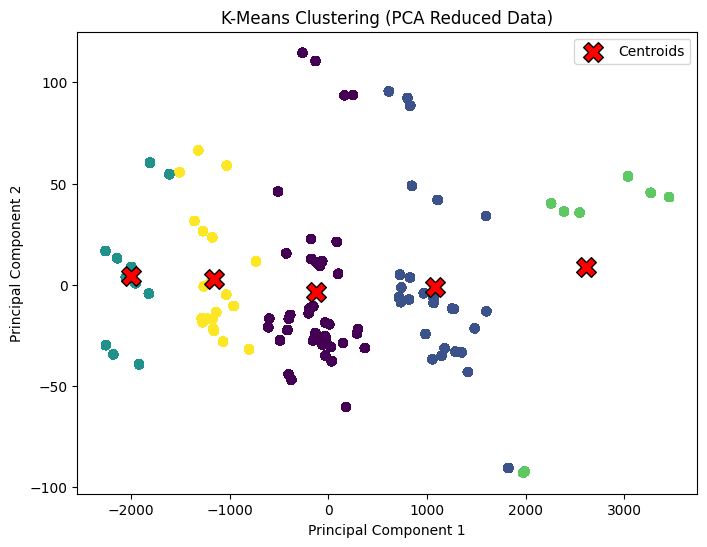

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, edgecolor='black', label="Centroids")
plt.title("K-Means Clustering (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
